***English Wikipedia page views, 2007 - 2020***

Data Curation Assignment (DATA512 A1) by Avani Bajaj (avanib01@uw.edu)

The goal of this assignment is to acquire, process, and analyze a dataset of monthly traffic on English Wikipedia from December 2007 to August 2020, inclusively. The steps taken are meant to be fully reproducible.

Import Packages

In [1]:
import requests
import csv
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

***Step 1 : Data Acquisition*** 

Setting API endpoints for the pagecount API and pageviews API

In [2]:
count_endpoint = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access}/{granularity}/{start}/{end}'
view_endpoint = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

Creating parameters to call the API

In [3]:
params_counts_allsites = {'project' : 'en.wikipedia.org',
            'access' : 'all-sites',
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2020080100'
            }

params_counts_mobilesites = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-site',
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2020080100'
            }
    
params_counts_desktopsites = {'project' : 'en.wikipedia.org',
            'access' : 'desktop-site',
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2020080100'
            }

In [4]:
params_views_desktop = {'project' : 'en.wikipedia.org',
            'access' : 'desktop',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2020080100'
            }

params_views_mobileweb = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-web',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2020080100'
            }

params_views_mobileapp = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-app',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2020080100'
            }

API calls to get mobile, desktop and both Wikipedia traffic data. The output is saved as json file with the format that includes the start and end date

In [5]:
api_call = requests.get(count_endpoint.format(**params_counts_allsites))
response_counts_allsites =api_call.json()
with open('pagecounts_all-sites_200801-202008.json', 'w') as f:
    json.dump(response_counts_allsites, f)
    
api_call = requests.get(count_endpoint.format(**params_counts_mobilesites))
response_counts_mobilesite = api_call.json()
with open('pagecounts_mobile-site_200801-202008.json', 'w') as f:
    json.dump(response_counts_mobilesite, f)


api_call = requests.get(count_endpoint.format(**params_counts_desktopsites))
response_counts_desktopsite = api_call.json()
with open('pagecounts_desktop-site_200801-202008.json', 'w') as f:
    json.dump(response_counts_desktopsite, f)

In [6]:
api_call = requests.get(view_endpoint.format(**params_views_desktop))
response_views_desktop = api_call.json()
with open('pageviews_all-sites_201507-202008.json', 'w') as f:
    json.dump(response_views_desktop, f)
    
api_call = requests.get(view_endpoint.format(**params_views_mobileweb))
response_views_mobileweb = api_call.json()
with open('pageviews_mobile-web_201507-202008.json', 'w') as f:
    json.dump(response_views_mobileweb, f)

api_call = requests.get(view_endpoint.format(**params_views_mobileapp))
response_views_mobileapp = api_call.json()
with open('pageviews_mobile-app_201507-202008.json', 'w') as f:
    json.dump(response_views_mobileapp, f)

***Step 2: Data Processing***

Perform data pre-processing on pagecount and pageviews

In [7]:
# get items and convert the responses into dataframes. This is required in for loop to get the length of the file
resp_count_df1 = pd.DataFrame(response_counts_allsites['items'])
resp_count_df2 = pd.DataFrame(response_counts_mobilesite['items'])
resp_count_df3 = pd.DataFrame(response_counts_desktopsite['items'])

# get items and convert the responses into dictionary to access individual objects
resp_count_dict1 = response_counts_allsites['items']
resp_count_dict2 = response_counts_mobilesite['items']
resp_count_dict3 = response_counts_desktopsite['items']

# create empty list
resp_count_all_view = []
resp_count_time = []
resp_count_mobile_view = []
resp_count_desktop_view = []

#load data from responses into the list. Used a single for loop to load mobile, desktop and both data 
for x in range(0,len(resp_count_df1)):
    resp_count_all_view.append(resp_count_dict1[x]['count'])
    resp_count_time.append(resp_count_dict1[x]['timestamp'])
    resp_count_desktop_view.append(resp_count_dict3[x]['count'])
    resp_count_mobile_view.append(resp_count_dict1[x]['count']-resp_count_dict3[x]['count'])
   
# wtite the list in a single dataframe
pagecount = pd.DataFrame(
    {'Date':resp_count_time,
     'pagecount_all_views': resp_count_all_view,
     'pagecount_desktop_views': resp_count_desktop_view,
     'pagecount_mobile_views': resp_count_mobile_view
    })

In [8]:
# get items and convert the responses into dataframes. This is required in for loop to get the length of the file
resp_view_df1 = pd.DataFrame(response_views_desktop['items'])
resp_view_df2 = pd.DataFrame(response_views_mobileweb['items'])
resp_view_df3 = pd.DataFrame(response_views_mobileapp['items'])

# get items and convert the responses into dictionary to access individual objects
resp_view_dict1 = response_views_desktop['items']
resp_view_dict2 = response_views_mobileweb['items']
resp_view_dict3 = response_views_mobileapp['items']

# create empty list
resp_view_desktop = []
resp_view_time = []
resp_view_mobile = []
resp_view_all = []

#load data from responses into the list. Used a single for loop to load mobile, desktop and both data 
for x in range(0,len(resp_view_df1)):
    resp_view_desktop.append(resp_view_dict1[x]['views'])
    resp_view_time.append(resp_view_dict1[x]['timestamp'])
    resp_view_mobile.append(resp_view_dict2[x]['views']+resp_view_dict3[x]['views'])
    resp_view_all.append(resp_view_dict1[x]['views']+resp_view_dict2[x]['views']+resp_view_dict3[x]['views'])
    
# write the list in a single dataframe    
pageview = pd.DataFrame(
    {'Date':resp_view_time,
     'pageview_all_views': resp_view_all,
     'pageview_desktop_views': resp_view_desktop,
     'pageview_mobile_views': resp_view_mobile
    })

Merging data to get a single dataframe for analysis

In [9]:
final_csv_df = pagecount.merge(pageview, left_on='Date', right_on='Date', how='outer').fillna(0)
final_csv_df['year'] = final_csv_df['Date'].str[0:4]
final_csv_df['month'] = final_csv_df['Date'].str[4:6]
final_csv_df['timestamp'] = final_csv_df['Date'].str[0:8]
final_csv_df['timestamp'] = final_csv_df['timestamp'].apply(pd.to_datetime)
final_csv_df = final_csv_df[['year', 'month', 'timestamp','pagecount_all_views', 'pagecount_desktop_views', 
'pagecount_mobile_views','pageview_all_views','pageview_desktop_views','pageview_mobile_views']]

Get the CSV file and store it

In [10]:
final_csv_df.to_csv('en-wikipedia_traffic_200801-202008.csv', sep=',')

***Step 3: Analysis***

Visualize the Wikipedia traffic for :

* Mobile traffic (For counts) 
* Mobile traffic (for views)
* Desktop traffic (for counts)
* Desktop traffic (for views)
* all traffic (mobile+desktop)


C:\Users\bajaj\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


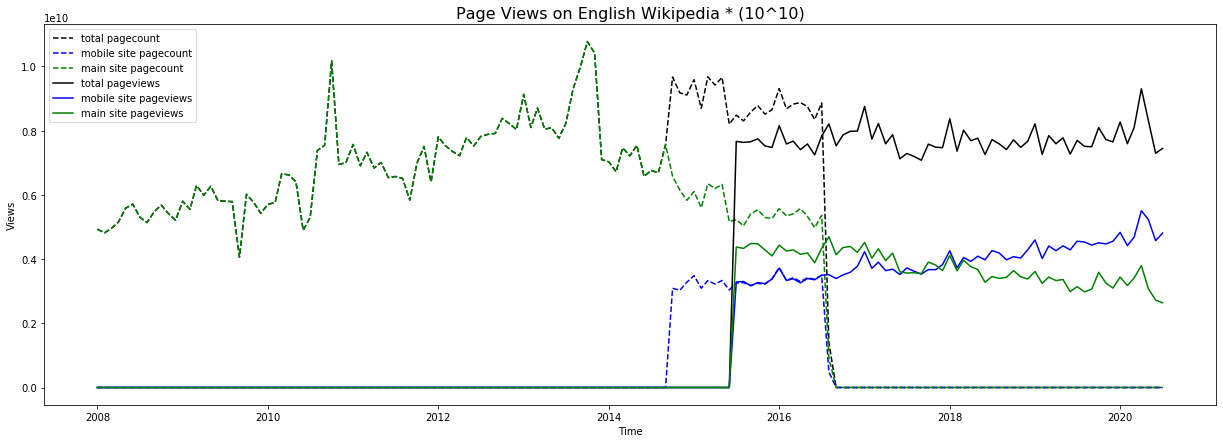

In [11]:
# Create the plot
fig, ax = plt.subplots(figsize=(21,7))
ax.plot_date(final_csv_df['timestamp'], final_csv_df['pagecount_all_views'], '--', color='black', label='total pagecount')
ax.plot_date(final_csv_df['timestamp'], final_csv_df['pagecount_mobile_views'], '--', color='blue', label='mobile site pagecount')
ax.plot_date(final_csv_df['timestamp'], final_csv_df['pagecount_desktop_views'], '--',color='green', label = 'main site pagecount')

ax.plot_date(final_csv_df['timestamp'], final_csv_df['pageview_all_views'], '-', color='black', label='total pageviews')
ax.plot_date(final_csv_df['timestamp'], final_csv_df['pageview_mobile_views'], '-', color='blue', label='mobile site pageviews' )
ax.plot_date(final_csv_df['timestamp'], final_csv_df['pageview_desktop_views'], '-',color='green', label='main site pageviews')

plt.title('Page Views on English Wikipedia * (10^10)', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Views')
ax.legend(loc='upper left')

*Formatting the plot for better visualization*  : 
As the data with 0 values are creating noise. We change 0s to Nan s
Also, in the month when the sites changed - we see a drop, we can also remove that to remove the noise

In [12]:
final_csv_df.replace(0, np.nan, inplace=True)

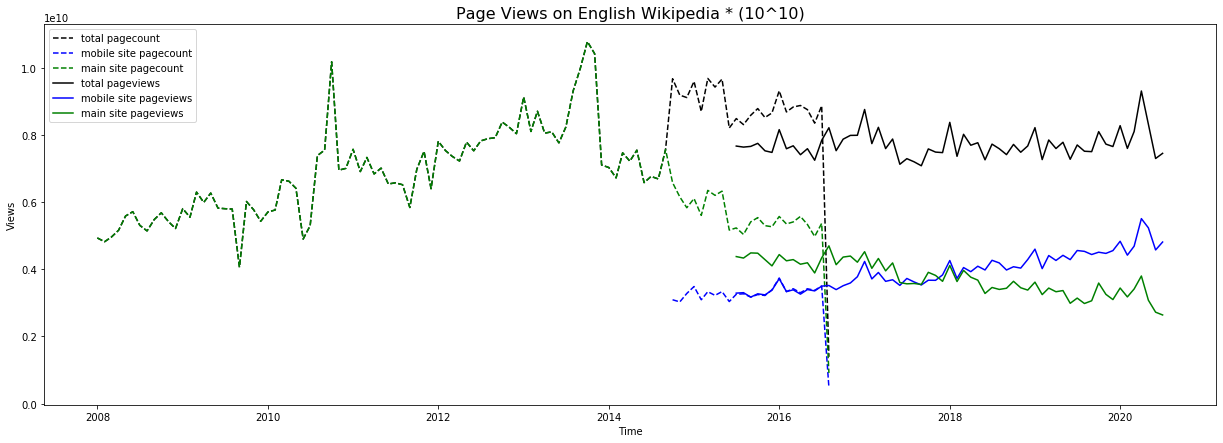

In [13]:
# Create the plot after changing 0 to Nan
fig, ax = plt.subplots(figsize=(21,7))
ax.plot_date(final_csv_df['timestamp'], final_csv_df['pagecount_all_views'], '--', color='black', label='total pagecount')
ax.plot_date(final_csv_df['timestamp'], final_csv_df['pagecount_mobile_views'], '--', color='blue', label='mobile site pagecount')
ax.plot_date(final_csv_df['timestamp'], final_csv_df['pagecount_desktop_views'], '--',color='green', label = 'main site pagecount')

ax.plot_date(final_csv_df['timestamp'], final_csv_df['pageview_all_views'], '-', color='black', label='total pageviews')
ax.plot_date(final_csv_df['timestamp'], final_csv_df['pageview_mobile_views'], '-', color='blue', label='mobile site pageviews' )
ax.plot_date(final_csv_df['timestamp'], final_csv_df['pageview_desktop_views'], '-',color='green', label='main site pageviews')

plt.title('Page Views on English Wikipedia * (10^10)', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Views')
ax.legend(loc='upper left')

In [14]:
final_csv_df['pagecount_all_views'].min()

1393717189.0

In [15]:
final_csv_df.timestamp[final_csv_df.pagecount_all_views==1393717189.0]

103   2016-08-01
Name: timestamp, dtype: datetime64[ns]

Considering data till the time the sites were not totally transferred 

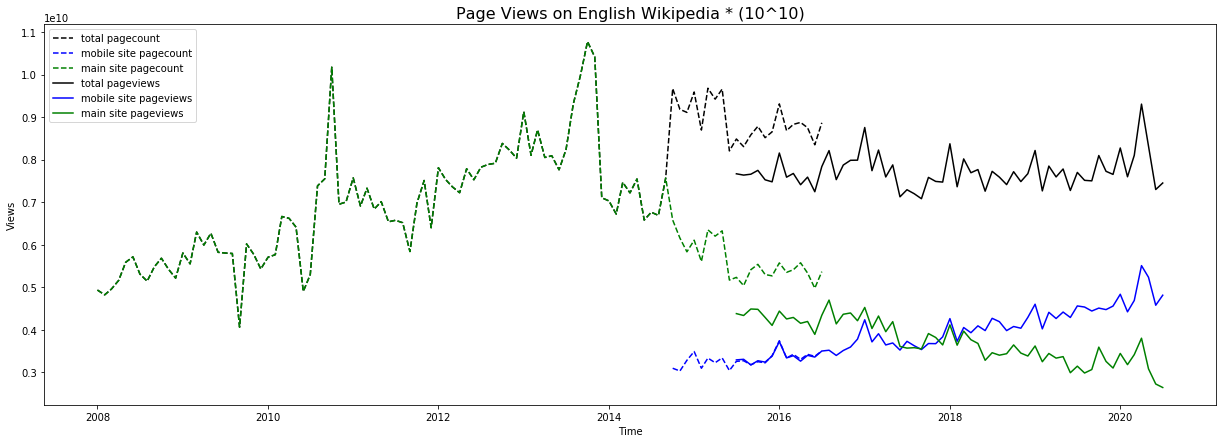

In [16]:
# Create the plot after changing 0 to Nan
fig, ax = plt.subplots(figsize=(21,7))
ax.plot_date(final_csv_df.timestamp[final_csv_df.timestamp<'2016-08'], final_csv_df.pagecount_all_views[final_csv_df.timestamp<'2016-08'], '--', color='black', label='total pagecount')
ax.plot_date(final_csv_df.timestamp[final_csv_df.timestamp<'2016-08'], final_csv_df.pagecount_mobile_views[final_csv_df.timestamp<'2016-08'], '--', color='blue', label='mobile site pagecount')
ax.plot_date(final_csv_df.timestamp[final_csv_df.timestamp<'2016-08'], final_csv_df.pagecount_desktop_views[final_csv_df.timestamp<'2016-08'], '--',color='green', label = 'main site pagecount')

ax.plot_date(final_csv_df['timestamp'], final_csv_df['pageview_all_views'], '-', color='black', label='total pageviews')
ax.plot_date(final_csv_df['timestamp'], final_csv_df['pageview_mobile_views'], '-', color='blue', label='mobile site pageviews' )
ax.plot_date(final_csv_df['timestamp'], final_csv_df['pageview_desktop_views'], '-',color='green', label='main site pageviews')

plt.title('Page Views on English Wikipedia * (10^10)', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Views')
ax.legend(loc='upper left')

Save the visualization plot

In [17]:
fig.savefig('PlotPageviewsWiki.png')